In [1]:
import numpy as np
import pandas as pd

In [2]:
%cd ..

C:\Users\magistr\anomalydetection


In [3]:
data = pd.read_csv('data/processed/tep_data.csv', index_col='Index')
print(f'Len of dataset: {data.shape[0]}')

Len of dataset: 12801


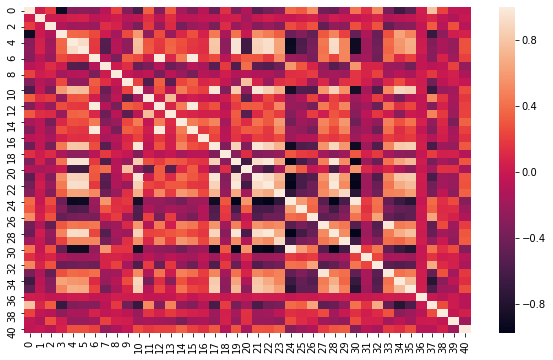

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(data.corr())

In [41]:
from src.models.lstm import build_model

build_params = dict(
    input_length=64,
    input_shape=data.shape[1],
    layers_size=[64, data.shape[1]],
    dropout_coeff=0.1,
)

Throw out not fully examples

In [30]:
seq_amount = data.shape[0] // build_params['input_length']
data = data.iloc[:seq_amount * build_params['input_length']]

In [25]:
X = data.iloc[:data.shape[0]-build_params['input_length']].to_numpy().\
        reshape(-1, build_params['input_length'], data.shape[1])
y = data.iloc[build_params['input_length']:].to_numpy().\
        reshape(-1, build_params['input_length'], data.shape[1])

In [17]:
fit_params = dict(
    batch_size=32,
    epochs=50,
    verbose=0,
)

In [39]:
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense

def build_model(input_length, input_shape, layers_size, dropout_coeff=0.2):
    """
    Builds lstm model with hidden layers of size `layers_size`
    """
    model = Sequential()
    # layers = {'input': 1, 'hidden1': 64, 'hidden2': 256, 'hidden3': 100, 'output': 1}

    model.add(LSTM(layers_size[0],
            input_shape=(input_length, input_shape),
            return_sequences=True))

    for i, size in enumerate(layers_size, 1):
        model.add(Dropout(dropout_coeff))
        model.add(LSTM(
            size,
            return_sequences=True,
        ))

    model.compile(loss="mse", optimizer="rmsprop")
    return model


In [42]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)

results = []

for i, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
    print(f'Fold {i}...')
    model = build_model(**build_params)
    history = model.fit(X[train_idx], y[train_idx], 
                        validation_data=(X[test_idx], y[test_idx]),
                        **fit_params)
    results.append(history.history)

Fold 0...
Instructions for updating:
Use tf.cast instead.
Train on 132 samples, validate on 67 samples
Epoch 1/50
132/132 [==============================] - 7s 50ms/step - loss: 0.9632 - val_loss: 0.8779
Epoch 2/50
132/132 [==============================] - 1s 9ms/step - loss: 0.8489 - val_loss: 0.8103
Epoch 3/50
132/132 [==============================] - 1s 9ms/step - loss: 0.7895 - val_loss: 0.7626
Epoch 4/50
132/132 [==============================] - 1s 9ms/step - loss: 0.7488 - val_loss: 0.7510
Epoch 5/50
132/132 [==============================] - 1s 9ms/step - loss: 0.7188 - val_loss: 0.7167
Epoch 6/50
132/132 [==============================] - 1s 9ms/step - loss: 0.6931 - val_loss: 0.6987
Epoch 7/50
132/132 [==============================] - 1s 9ms/step - loss: 0.6701 - val_loss: 0.6961
Epoch 8/50
132/132 [==============================] - 1s 9ms/step - loss: 0.6552 - val_loss: 0.6734
Epoch 9/50
132/132 [==============================] - 1s 9ms/step - loss: 0.6344 - val_loss: 0.6

In [44]:
[result['val_loss'] for result in results]

[[0.8779059292665169,
  0.8103147745132446,
  0.7625834497053232,
  0.7510197892117856,
  0.7167194690277328,
  0.6987307641043592,
  0.6960535494249258,
  0.6733810136567301,
  0.6623563962196236,
  0.6627477834473795,
  0.6614670806856298,
  0.6400780410908941,
  0.6377618081534087,
  0.6396180426896508,
  0.6418545406256149,
  0.6481766006839809,
  0.6347075985438788,
  0.6243688579815537,
  0.6300301605196141,
  0.6270589348095567,
  0.6171940280430352,
  0.6319030025112096,
  0.6265043420578117,
  0.6148814790284456,
  0.6246850063551718,
  0.615502780053153,
  0.6218031075463366,
  0.6204595699239133,
  0.6097828514540373,
  0.609299918608879,
  0.6024224473469293,
  0.6093198212225046,
  0.6197308577708344,
  0.6087705421803603,
  0.6025142945460419,
  0.5935895345104274,
  0.5972659845850361,
  0.5939124671380911,
  0.6032231058647384,
  0.59481472755546,
  0.591993245615888,
  0.6015417397911869,
  0.605019093449436,
  0.5950067710520616,
  0.5941543436762112,
  0.584589581880